In [1]:
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config IPCompleter.greedy=True

#Datos de Properati
data = pd.read_csv('/home/martin/Documents/jupyter/datasets/properati-AR-2017-08-01-properties-sell.csv')

In [2]:
#Separo los datos de Capital Federal y Gran Buenos Aires
dataCFs = data[data['state_name']== 'Capital Federal']
dataGBAs = data.loc[data.state_name.str.contains('G.B.A.'),:]

#Filtro los datos que me interesan (barrio, superficie, y precio)
dataCF = dataCFs[['place_name','surface_covered_in_m2','price_per_m2']]
dataGBA = dataGBAs[['place_name','surface_covered_in_m2','price_per_m2']]

#Limpio los Na
dataCF.dropna(inplace = True)
dataGBA.dropna(inplace = True)

#Agrego una columna con el precio de la propiedad (superficie*precio por m2)
dataCF['precio_propiedad'] = dataCF['surface_covered_in_m2']*dataCF['price_per_m2']
dataGBA['precio_propiedad'] = dataGBA['surface_covered_in_m2']*dataGBA['price_per_m2']

#Armo un join de ambos datos
dataCFGBA = pd.concat([dataCF, dataGBA])

/home/martin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/home/martin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/martin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stabl

In [3]:
dataCFGBA.sample(10)

,place_name,surface_covered_in_m2,price_per_m2,precio_propiedad
87367,Ramos Mejía,50.0,1960.000000,98000.0
168003,Tigre,361.0,3047.091413,1100000.0
101636,San Miguel,47.0,1702.127660,80000.0
165544,Tigre,63.0,1984.126984,125000.0
45285,Ciudadela,44.0,1636.363636,72000.0
75988,Martínez,72.0,3888.888889,280000.0
71729,Florida,88.0,3295.454545,290000.0
177594,Barracas,53.0,2245.283019,119000.0
60129,Colegiales,95.0,1968.421053,187000.0
154685,Tres de Febrero,76.0,2434.210526,185000.0


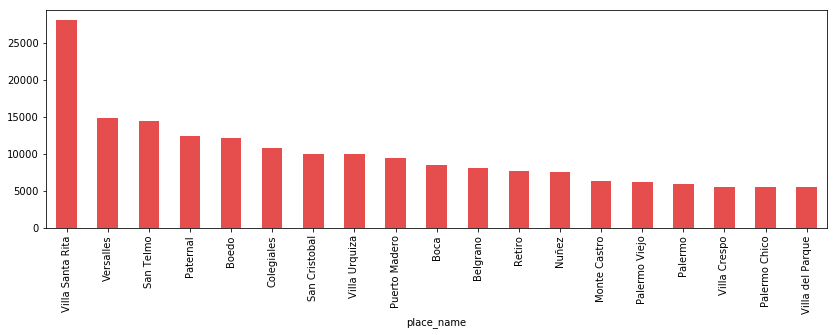

In [4]:
#Barrios de mayor precio por metro cuadrado en Capital Federal
dataCF.groupby('place_name').mean()['price_per_m2'].sort_values(ascending=False)[0:19].plot(kind='bar',figsize=(14,4),color=(0.9,0.3,0.3));

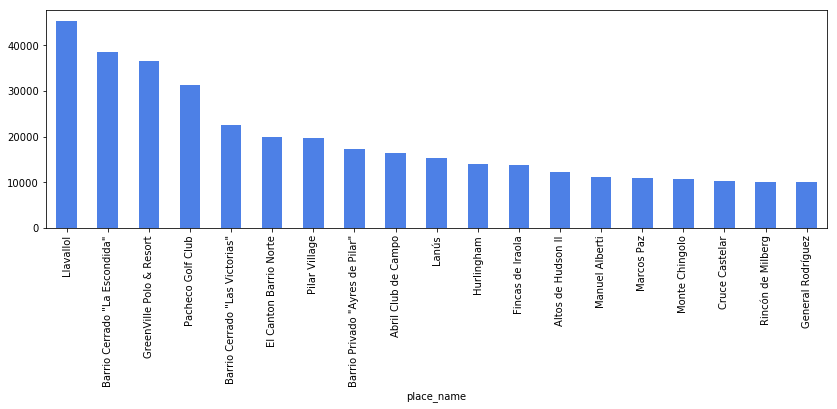

In [5]:
#Barrios de mayor precio por metro cuadrado en Gran Buenos Aires
dataGBA.groupby('place_name').mean()['price_per_m2'].sort_values(ascending=False)[0:19].plot(kind='bar',figsize=(14,4),color=(0.3,0.5,0.9));

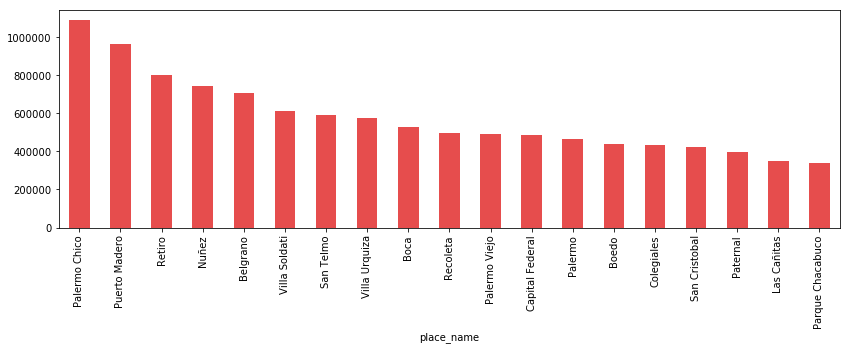

In [6]:
#Barrios de mayor precio de propiedad en Capital Federal
dataCF.groupby('place_name').mean()['precio_propiedad'].sort_values(ascending=False)[0:19].plot(kind='bar',figsize=(14,4),color=(0.9,0.3,0.3));

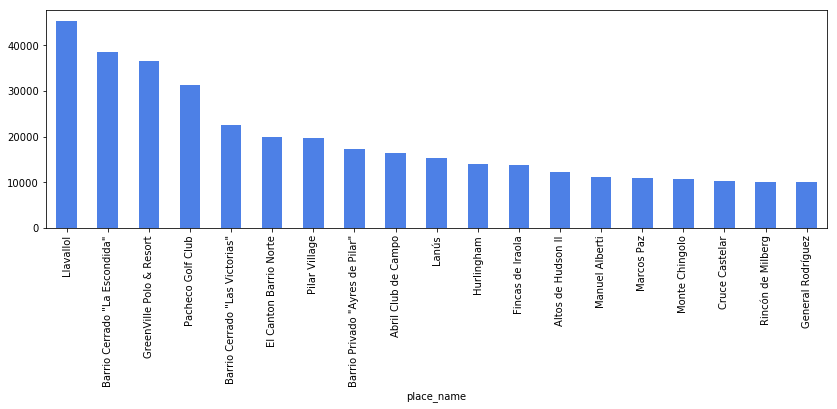

In [7]:
#Barrios de mayor precio de propiedad en Gran Buenos Aires
dataGBA.groupby('place_name').mean()['price_per_m2'].sort_values(ascending=False)[0:19].plot(kind='bar',figsize=(14,4),color=(0.3,0.5,0.9));

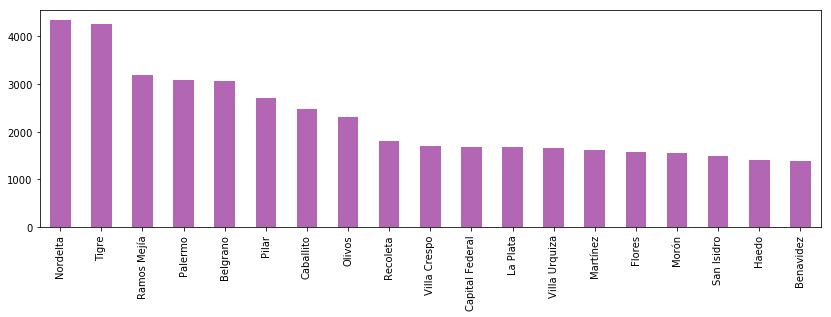

In [8]:
#Top de propiedades por barrio (GBA y CF)
dataCFGBA['place_name'].value_counts()[0:19].plot(kind='bar',figsize=(14,4), color=(0.7,0.4,0.7));